In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
import random
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [7]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    dataset = []
    
    for unitData in os.listdir(SOURCE):
        data = SOURCE + unitData
        if(os.path.getsize(data) > 0):
            dataset.append(unitData)
        else:
            print('Skipped ' + unitData)
            print('Invalid file i.e zero size')
    
    train_set_length = int(len(dataset) * SPLIT_SIZE)
    test_set_length = int(len(dataset) - train_set_length)
    shuffled_set = random.sample(dataset, len(dataset))
    train_set = dataset[0:train_set_length]
    test_set = dataset[-test_set_length:]
       
    for unitData in train_set:
        temp_train_set = SOURCE + unitData
        final_train_set = TRAINING + unitData
        copyfile(temp_train_set, final_train_set)
    
    for unitData in test_set:
        temp_test_set = SOURCE + unitData
        final_test_set = TESTING + unitData
        copyfile(temp_test_set, final_test_set)
        
        
WITH_MASK_SOURCE_DIR = "/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/dataset/with_mask/"
TRAINING_WITH_MASK_DIR = "/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/dataset/train/with_mask1/"
TESTING_WITH_MASK_DIR = "/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/dataset/test/with_mask1/"
WITHOUT_MASK_SOURCE_DIR = "/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/dataset/without_mask/"
TRAINING_WITHOUT_MASK_DIR = "/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/dataset/train/without_mask1/"
TESTING_WITHOUT_MASK_DIR = "/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/dataset/test/without_mask1/"
split_size = .8
split_data(WITH_MASK_SOURCE_DIR, TRAINING_WITH_MASK_DIR, TESTING_WITH_MASK_DIR, split_size)
split_data(WITHOUT_MASK_SOURCE_DIR, TRAINING_WITHOUT_MASK_DIR, TESTING_WITHOUT_MASK_DIR, split_size)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/dataset/with_mask/'

In [2]:
print("Training set with mask",len(os.listdir('/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/dataset/train/with_mask1/')))

print("Training set without mask",len(os.listdir('/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/dataset/train/without_mask1/')))

print("Test set with mask",len(os.listdir('/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/dataset/test/with_mask1/')))

print("Test set without mask",len(os.listdir('/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/dataset/test/without_mask1/')))

Training set with mask 2980
Training set without mask 3062
Test set with mask 745
Test set without mask 766


In [3]:
train = ImageDataGenerator(rescale=1/255, 
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')
test = ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset = train.flow_from_directory("/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/dataset/train/",
                                        target_size = (150,150), batch_size = 32, class_mode = 'binary')

test_dataset = test.flow_from_directory("/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/dataset/test/",
                                        target_size = (150,150), batch_size = 32, class_mode = 'binary')

Found 6042 images belonging to 2 classes.
Found 1511 images belonging to 2 classes.


In [5]:
test_dataset.class_indices

{'with_mask1': 0, 'without_mask1': 1}

In [17]:
# Creating the CNN Model for Image Classification
model = keras.Sequential()

#Covolution layer and Max Pool layer 1
model.add(keras.layers.Conv2D(100,(3,3), activation='relu', input_shape = (150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

#Covolution layer and Max Pool layer 2
model.add(keras.layers.Conv2D(100,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

#Converting the multidimensional image data array into 1d array
model.add(keras.layers.Flatten())

# Hidden layer with 50 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(50,activation='relu'))

model.add(keras.layers.Dense(2,activation='softmax'))

In [18]:
# Defining the optimizer and the loss function. 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Optimizers are used to reduce losses when loss is high by changing the learning rate of the model and is used to measure how good our model predicted output when compared with true output

In [19]:
# Training the Model

model.fit_generator(train_dataset,
         epochs = 10,
         validation_data = test_dataset
         )

Epoch 1/10
 74/189 [==========>...................] - ETA: 1:53 - loss: 0.6833 - acc: 0.7099

/opt/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


189/189 [==============================] - 216s 1s/step - loss: 0.5334 - acc: 0.7713 - val_loss: 0.3253 - val_acc: 0.8623
Epoch 2/10
189/189 [==============================] - 241s 1s/step - loss: 0.4185 - acc: 0.8128 - val_loss: 0.3537 - val_acc: 0.8432
Epoch 3/10
189/189 [==============================] - 225s 1s/step - loss: 0.3918 - acc: 0.8325 - val_loss: 0.3345 - val_acc: 0.8630
Epoch 4/10
189/189 [==============================] - 243s 1s/step - loss: 0.3682 - acc: 0.8409 - val_loss: 0.2807 - val_acc: 0.8756
Epoch 5/10
189/189 [==============================] - 236s 1s/step - loss: 0.3534 - acc: 0.8467 - val_loss: 0.2686 - val_acc: 0.8915
Epoch 6/10
189/189 [==============================] - 238s 1s/step - loss: 0.3373 - acc: 0.8567 - val_loss: 0.2517 - val_acc: 0.8974
Epoch 7/10
189/189 [==============================] - 228s 1s/step - loss: 0.3246 - acc: 0.8592 - val_loss: 0.2429 - val_acc: 0.9034
Epoch 8/10
189/189 [==============================] - 235s 1s/step - loss: 0.310

In [20]:
# Using the Model to make Predictions

class_name = ['With Mask','Without Mask']

def predictImage(filepath):
    
    img1 = image.load_img(filepath, target_size = (150,150))
    
    plt.imshow(img1)
    
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y, axis=0)
    
    result = model.predict(X)
    
    index = np.argmax(result)
    
    print("Prediction: ", class_name[index])

Prediction:  With Mask


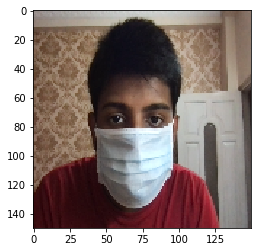

In [30]:
predictImage(r"/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/prediction_images/8.png")

In [ ]:
labels_dict={0:'with_mask',1:'without_mask'}
color_dict={0:(0,255,0),1:(0,0,255)}
size = 4
video_capture = cv2.VideoCapture(0) #Use camera 0

# We load the xml file
classifier = cv2.CascadeClassifier('/Users/trishit/Code/Udemy/Tensorflow-Bootcamp/Face-Mask-Detection-Using-Image-Recognition/haarcascade_frontalface_default.xml')

while True:
    (rval, im) = video_capture.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror

    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)
     
    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        #Y = image.img_to_array(resized)
        #X = np.expand_dims(Y, axis=0)
        result = model.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
        #print(label)
        
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image
    cv2.imshow('Face Mask Detection',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
# Stop video
video_capture.release()

# Close all started windows
cv2.destroyAllWindows()